## SHERLY WAHYUNI
## 2021-31-073
## PEMBELAJARAN MESIN (C)

### > Regresi: Corruptions

In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
from sklearn.linear_model import LinearRegression 

In [2]:
data = pd.read_csv('R04_corruptions.csv')
data.head()

,Corruption Perception (X),Government Transparency (Y)
0,3.2,65
1,2.5,72
2,4.1,58
3,2.8,68
4,3.5,60


In [3]:
# menhitung korelasi antar kolom
data.corr()

,Corruption Perception (X),Government Transparency (Y)
Corruption Perception (X),1.000000,-0.920063
Government Transparency (Y),-0.920063,1.000000


In [4]:
# memudahkan visualisasi data
import numpy as np
Corruption_Perception_X = data['Corruption Perception (X)'].values[:, np.newaxis]
Government_Transparency_Y =  data['Government Transparency (Y)'].values

In [5]:
# melatih model regresi linear
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()

model1.fit(Corruption_Perception_X, Government_Transparency_Y)

LinearRegression()

In [6]:
# memprediksi kolom y
Corruption_Perception_X_test = [[3],[4.5]]
pred_Government_Transparency_Y = model1.predict(Corruption_Perception_X_test)

print("Prediksi Pemerintah: ", pred_Government_Transparency_Y)

Prediksi Pemerintah:  [67.5018818  51.11695587]


In [7]:
# rumus regresi -> y = ax + b (a = koefisien, b = intercept)
print("Koefisien: ", model1.coef_)
print("Intercept: ", model1.intercept_)

Koefisien:  [-10.92328395]
Intercept:  100.27173366009497


In [8]:
# testing rumus
y = model1.coef_* 25 + model1.intercept_
print(y)

[-172.8103652]


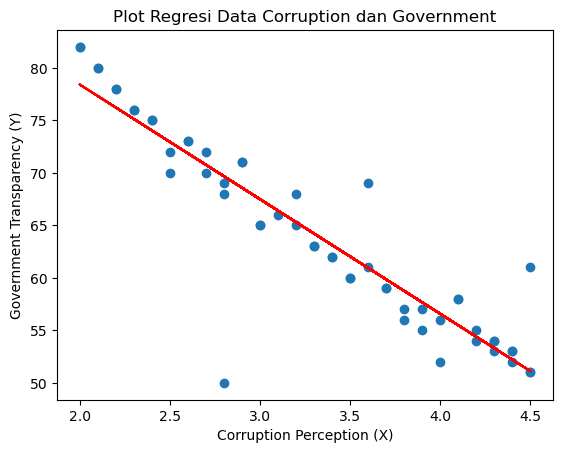

In [9]:
# melihat hasil visualisasi data 
import matplotlib.pyplot as plt 

prediksi_Government_Transparency_Y = model1.predict(Corruption_Perception_X)
dataframe_baru = pd.DataFrame({'Corruption Perception (X)': data['Corruption Perception (X)'], 'Government Transparency (Y)': prediksi_Government_Transparency_Y})
plt.scatter(data['Corruption Perception (X)'], data['Government Transparency (Y)'])
plt.plot(dataframe_baru['Corruption Perception (X)'], dataframe_baru['Government Transparency (Y)'], color='red')
plt.xlabel('Corruption Perception (X)')
plt.ylabel('Government Transparency (Y)')
plt.title('Plot Regresi Data Corruption dan Government')
plt.show()

### > Klasifikasi: Diabetes

In [10]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier ,  plot_tree #DecisionTreeClassifier  (model)

In [11]:
diabetes = pd.read_csv('K02_diabetes.csv')

In [12]:
diabetes

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [13]:
diabetes.info

<bound method DataFrame.info of        gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1           never  25.19   
1      Female  54.0             0              0         No Info  27.32   
2        Male  28.0             0              0           never  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99995  Female  80.0             0              0         No Info  27.32   
99996  Female   2.0             0              0         No Info  17.37   
99997    Male  66.0             0              0          former  27.83   
99998  Female  24.0             0              0           never  35.42   
99999  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              

In [14]:
diabetes.gender.unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [15]:
diabetes.age.unique()

array([80.  , 54.  , 28.  , 36.  , 76.  , 20.  , 44.  , 79.  , 42.  ,
       32.  , 53.  , 78.  , 67.  , 15.  , 37.  , 40.  ,  5.  , 69.  ,
       72.  ,  4.  , 30.  , 45.  , 43.  , 50.  , 41.  , 26.  , 34.  ,
       73.  , 77.  , 66.  , 29.  , 60.  , 38.  ,  3.  , 57.  , 74.  ,
       19.  , 46.  , 21.  , 59.  , 27.  , 13.  , 56.  ,  2.  ,  7.  ,
       11.  ,  6.  , 55.  ,  9.  , 62.  , 47.  , 12.  , 68.  , 75.  ,
       22.  , 58.  , 18.  , 24.  , 17.  , 25.  ,  0.08, 33.  , 16.  ,
       61.  , 31.  ,  8.  , 49.  , 39.  , 65.  , 14.  , 70.  ,  0.56,
       48.  , 51.  , 71.  ,  0.88, 64.  , 63.  , 52.  ,  0.16, 10.  ,
       35.  , 23.  ,  0.64,  1.16,  1.64,  0.72,  1.88,  1.32,  0.8 ,
        1.24,  1.  ,  1.8 ,  0.48,  1.56,  1.08,  0.24,  1.4 ,  0.4 ,
        0.32,  1.72,  1.48])

In [16]:
diabetes.hypertension.unique()

array([0, 1], dtype=int64)

In [17]:
diabetes.heart_disease.unique()

array([1, 0], dtype=int64)

In [18]:
diabetes.smoking_history.unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [19]:
diabetes.bmi.unique()

array([25.19, 27.32, 23.45, ..., 59.42, 44.39, 60.52])

In [20]:
diabetes.HbA1c_level.unique()

array([6.6, 5.7, 5. , 4.8, 6.5, 6.1, 6. , 5.8, 3.5, 6.2, 4. , 4.5, 9. ,
       7. , 8.8, 8.2, 7.5, 6.8])

In [21]:
diabetes.blood_glucose_level.unique()

array([140,  80, 158, 155,  85, 200, 145, 100, 130, 160, 126, 159,  90,
       260, 220, 300, 280, 240], dtype=int64)

In [22]:
diabetes.diabetes.unique()

array([0, 1], dtype=int64)

In [23]:
diabetes.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
for col in ['gender', 'smoking_history']:
        label_encoder = LabelEncoder()
        diabetes[col] = label_encoder.fit_transform(diabetes[col])

In [26]:
diabetes

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0


In [27]:
x = diabetes.drop('diabetes', axis = 1)
y = diabetes['diabetes']

In [28]:
x

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,4,25.19,6.6,140
1,0,54.0,0,0,0,27.32,6.6,80
2,1,28.0,0,0,4,27.32,5.7,158
3,0,36.0,0,0,1,23.45,5.0,155
4,1,76.0,1,1,1,20.14,4.8,155
...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90
99996,0,2.0,0,0,0,17.37,6.5,100
99997,1,66.0,0,0,3,27.83,5.7,155
99998,0,24.0,0,0,4,35.42,4.0,100


In [29]:
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15)

In [32]:
x_train.shape

(85000, 8)

In [33]:
x_test.shape

(15000, 8)

In [34]:
y_train.shape

(85000,)

In [35]:
y_test.shape

(15000,)

In [36]:
from sklearn.tree import DecisionTreeClassifier
modelDT = DecisionTreeClassifier(max_depth=3)
modelDT.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [37]:
hasil_prediksi_dt = modelDT.predict(x_test)

In [44]:
print('Akurasi Model ', accuracy_score(y_test, hasil_prediksi_dt) * 100)

NameError: name 'accuracy_score' is not defined

In [42]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

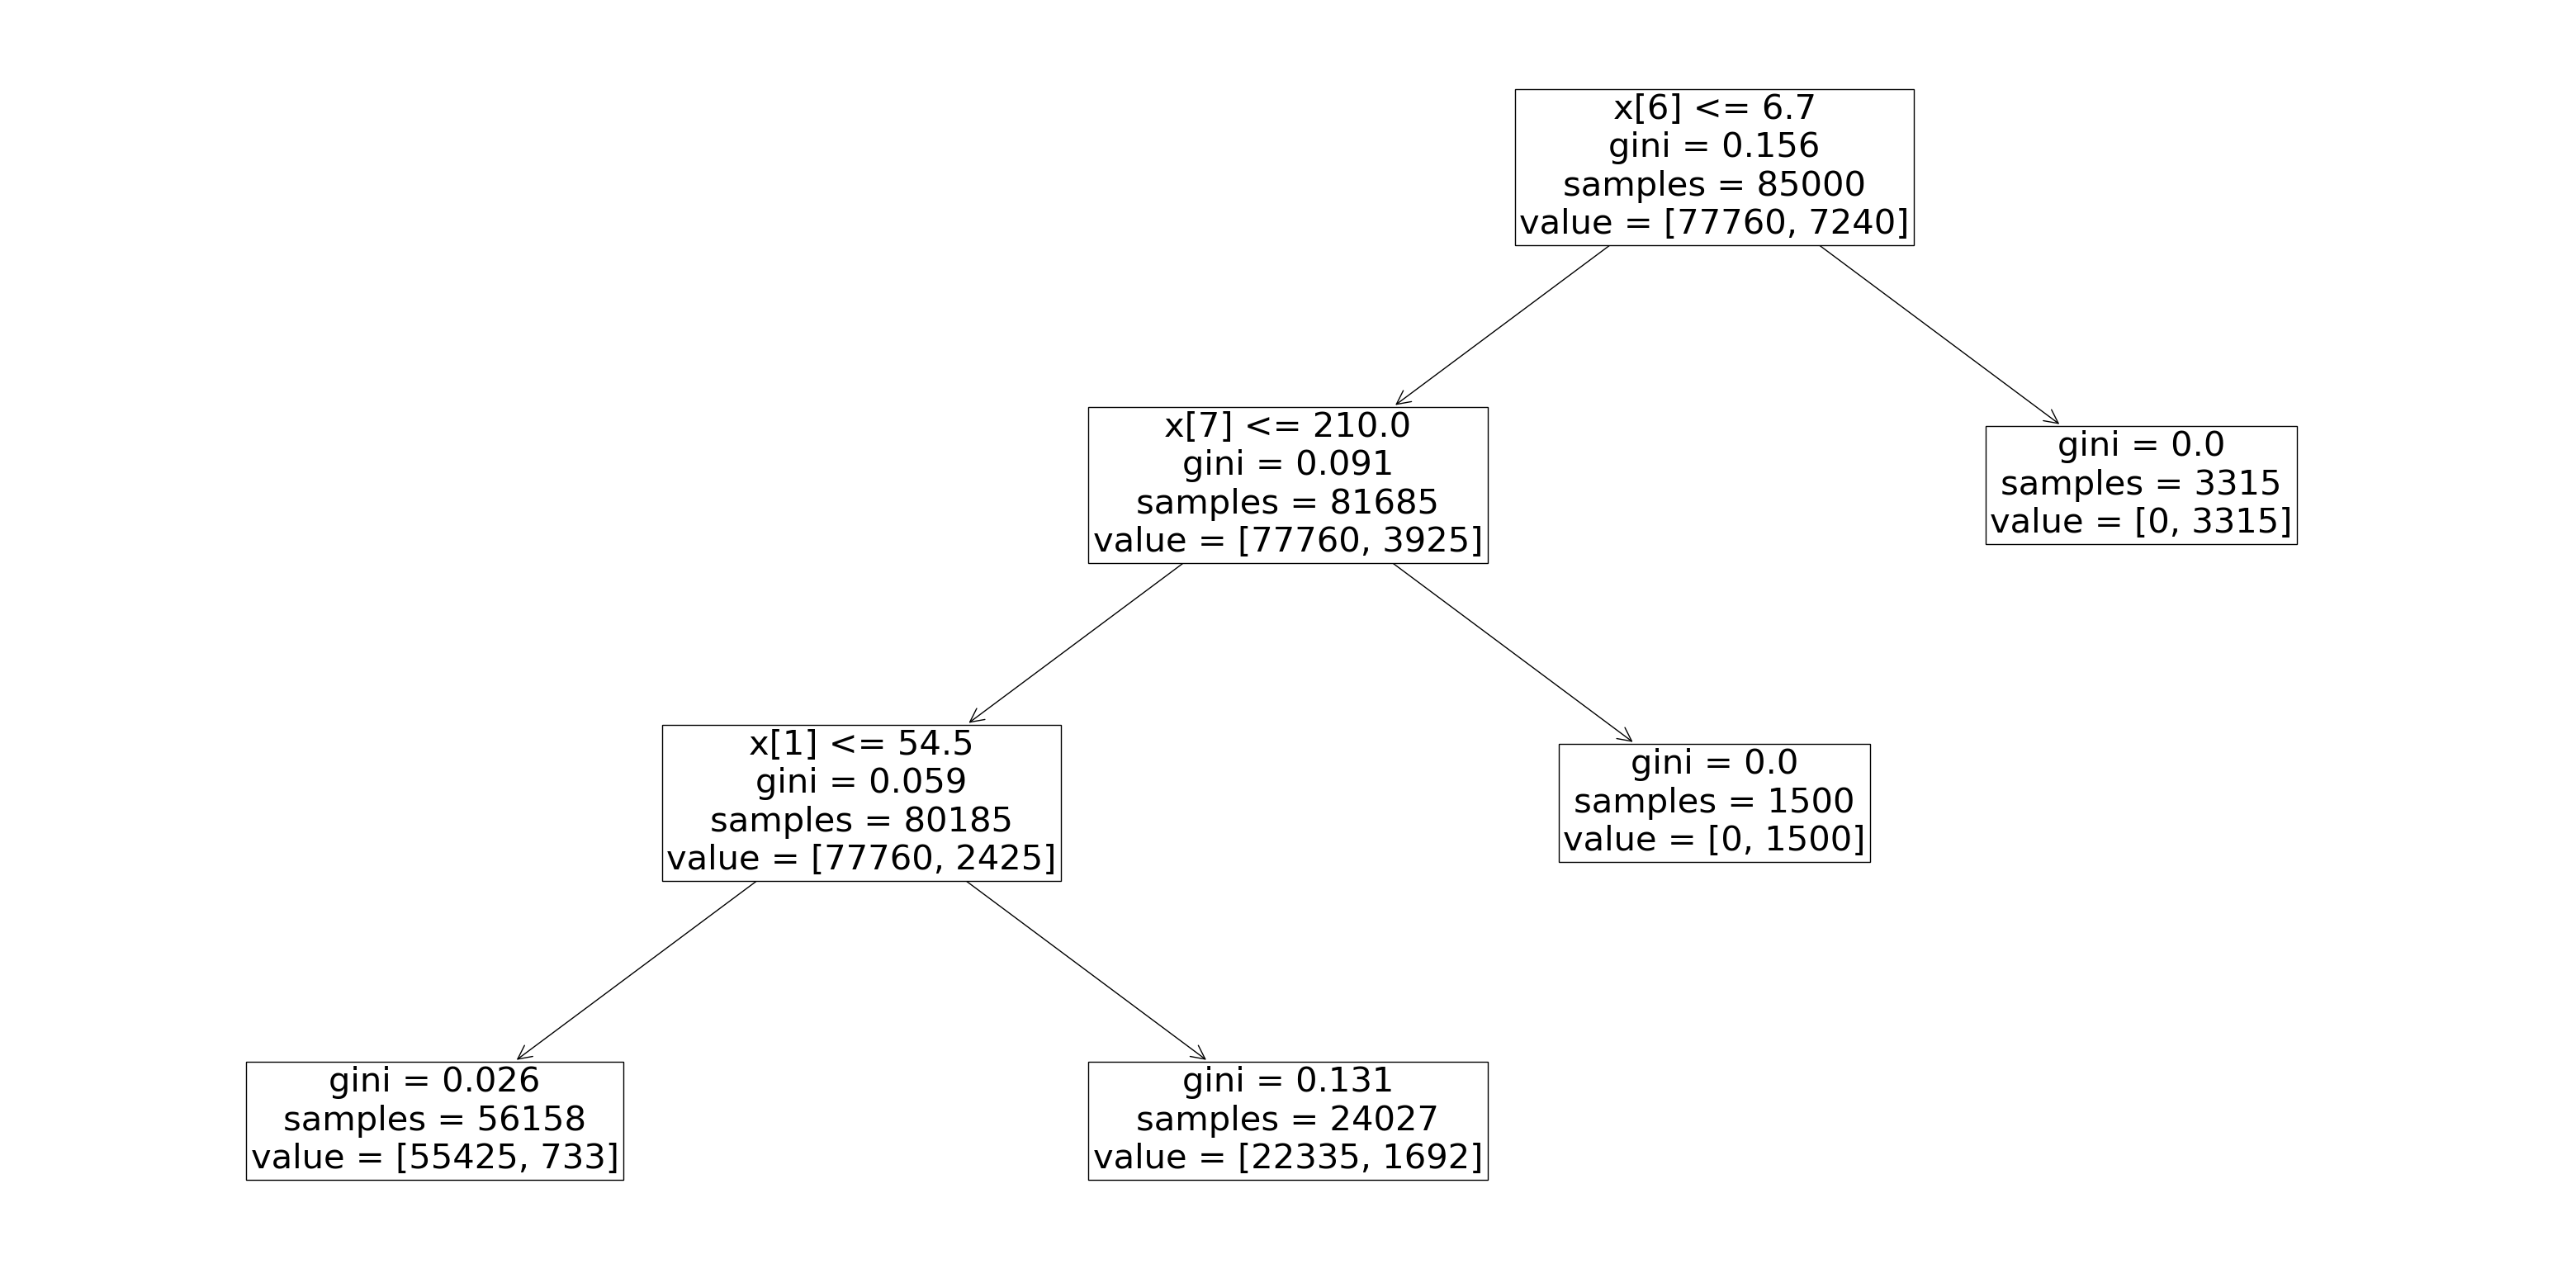

In [40]:
plt.subplots(figsize=(40, 20))
plot_tree(modelDT, fontsize=30)
plt.show()